# CytoTable from the cloud (using cloud-based data sources)

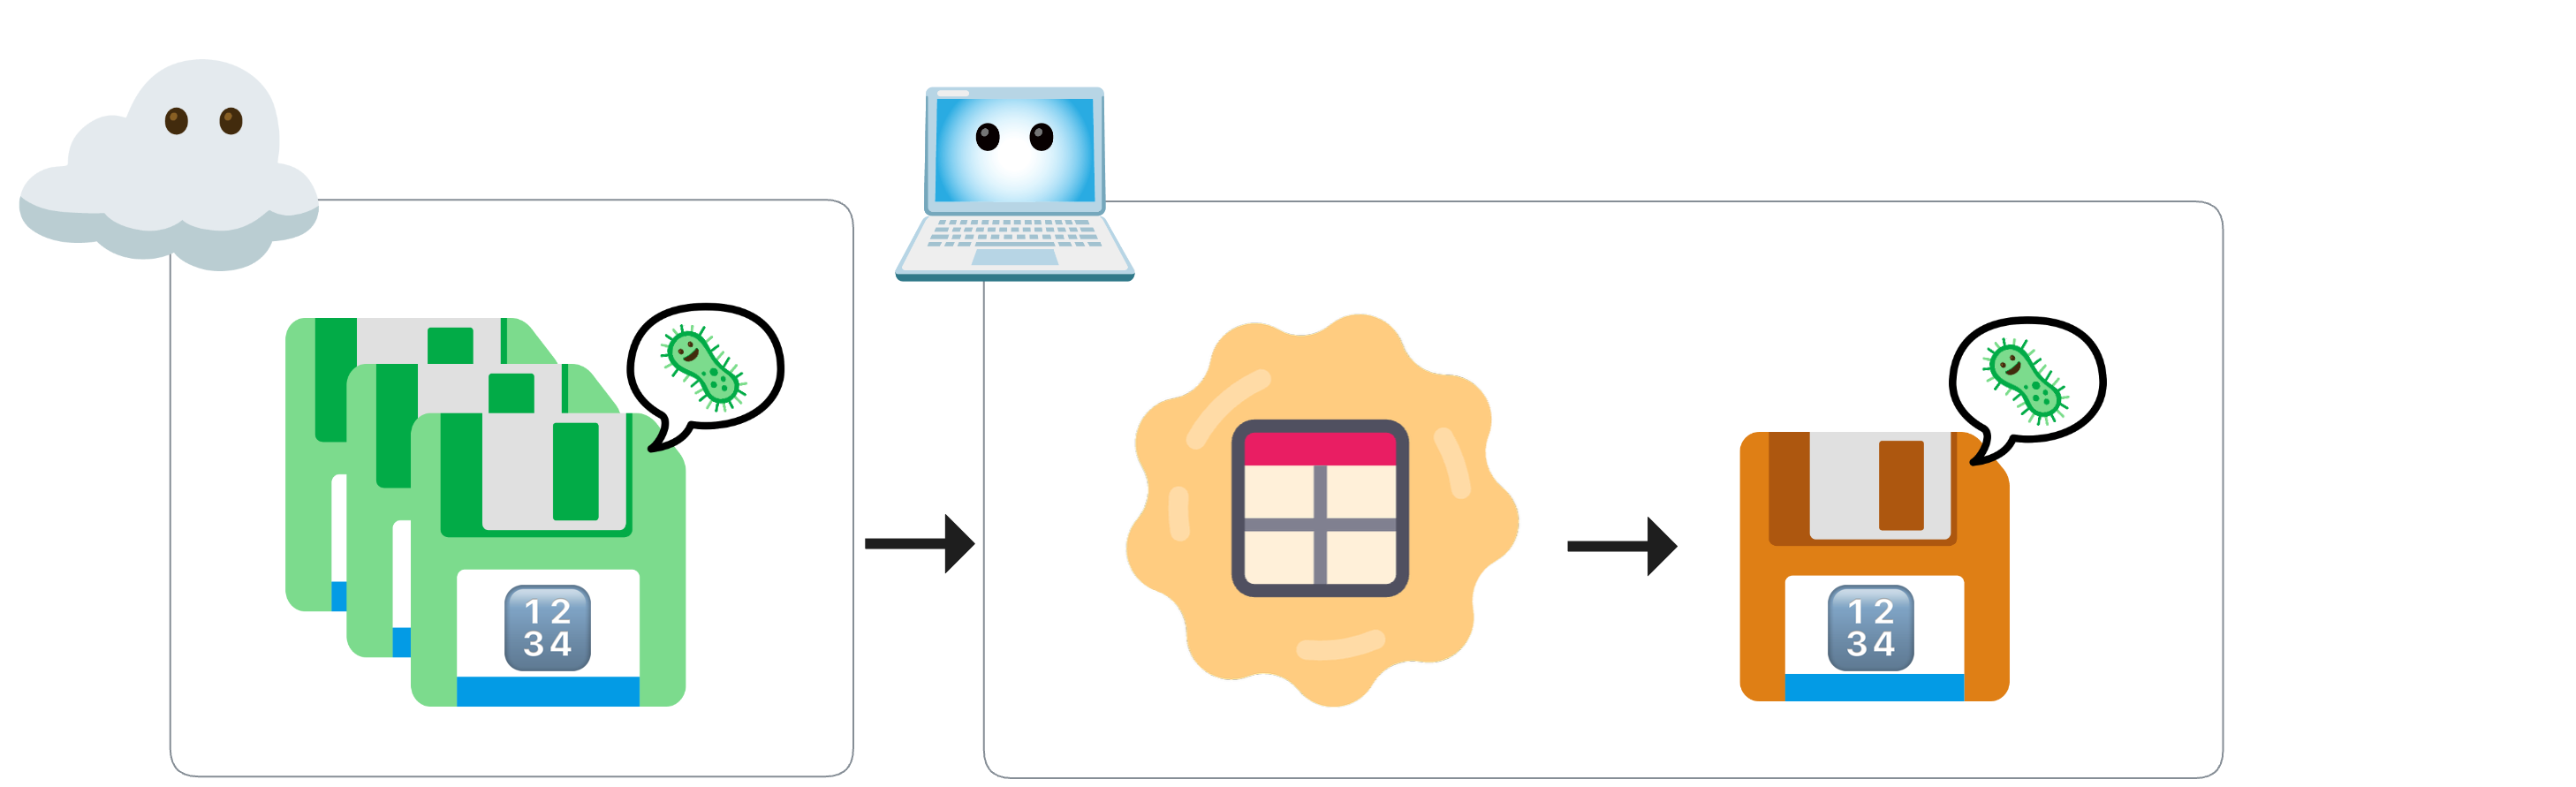

__Figure 1.__ _CytoTable is capable of reading feature data from cloud-based locations such as AWS S3._

This notebook includes a quick demonstration of CytoTable with cloud-based data sources.
For a more general overview of using CytoTable and the concepts behind the work please see: [CytoTable mise en place (general overview)](https://cytomining.github.io/CytoTable/examples/cytotable_mise_en_place_general_overview.html)

In [1]:
import pathlib
from collections import Counter
from cloudpathlib import S3Client, CloudPath

import pandas as pd
import pyarrow.parquet as pq
from IPython.display import Image, display
from PIL import Image

import cytotable

# setup variables for use throughout the notebook
source_path = "s3://cellpainting-gallery/cpg0000-jump-pilot/source_4/workspace/analysis/2020_11_04_CPJUMP1/BR00116991/analysis/BR00116991-A01-1"
dest_path = "./cloud_example.parquet"

/Users/buntend/Library/Caches/pypoetry/virtualenvs/cytotable-Y1C43DIB-py3.11/lib/python3.11/site-packages/google_crc32c/__config__.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# setup a source cloudpath using unsigned (anonymous) requests to AWS S3
source_cloud_path = S3Client(no_sign_request=True).CloudPath(source_path)
source_cloud_path

S3Path('s3://cellpainting-gallery/cpg0000-jump-pilot/source_4/workspace/analysis/2020_11_04_CPJUMP1/BR00116991/analysis/BR00116991-A01-1')

In [3]:
# remove the dest_path if it's present
if pathlib.Path(dest_path).is_file():
    pathlib.Path(dest_path).unlink()

In [4]:
# show the files we will use as source data with CytoTable
list(source_cloud_path.glob("*"))

[S3Path('s3://cellpainting-gallery/cpg0000-jump-pilot/source_4/workspace/analysis/2020_11_04_CPJUMP1/BR00116991/analysis/BR00116991-A01-1/outlines'),
 S3Path('s3://cellpainting-gallery/cpg0000-jump-pilot/source_4/workspace/analysis/2020_11_04_CPJUMP1/BR00116991/analysis/BR00116991-A01-1/Cells.csv'),
 S3Path('s3://cellpainting-gallery/cpg0000-jump-pilot/source_4/workspace/analysis/2020_11_04_CPJUMP1/BR00116991/analysis/BR00116991-A01-1/Cytoplasm.csv'),
 S3Path('s3://cellpainting-gallery/cpg0000-jump-pilot/source_4/workspace/analysis/2020_11_04_CPJUMP1/BR00116991/analysis/BR00116991-A01-1/Experiment.csv'),
 S3Path('s3://cellpainting-gallery/cpg0000-jump-pilot/source_4/workspace/analysis/2020_11_04_CPJUMP1/BR00116991/analysis/BR00116991-A01-1/Image.csv'),
 S3Path('s3://cellpainting-gallery/cpg0000-jump-pilot/source_4/workspace/analysis/2020_11_04_CPJUMP1/BR00116991/analysis/BR00116991-A01-1/Nuclei.csv')]

In [5]:
%%time

# run cytotable convert
result = cytotable.convert(
    source_path=source_path,
    dest_path=dest_path,
    # specify a destination data format type
    dest_datatype="parquet",
    # specify a preset which enables quick use of common input file formats
    preset="cellprofiler_csv",
    # use unsigned (anonymous) requests to AWS S3
    no_sign_request=True,
)
print(pathlib.Path(result).name)

CPU times: user 657 ms, sys: 474 ms, total: 1.13 s
Wall time: 23.1 s


'cloud_example.parquet'

In [6]:
# show the table head using pandas
pq.read_table(source=result).to_pandas().head()

,Metadata_ImageNumber,Metadata_Cells_Parent_Nuclei,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_ObjectNumber,Image_FileName_CellOutlines,Image_FileName_IllumAGP,Image_FileName_IllumBrightfield,Image_FileName_IllumDNA,Image_FileName_IllumER,...,Nuclei_Texture_Variance_RNA_10_02_256,Nuclei_Texture_Variance_RNA_10_03_256,Nuclei_Texture_Variance_RNA_3_00_256,Nuclei_Texture_Variance_RNA_3_01_256,Nuclei_Texture_Variance_RNA_3_02_256,Nuclei_Texture_Variance_RNA_3_03_256,Nuclei_Texture_Variance_RNA_5_00_256,Nuclei_Texture_Variance_RNA_5_01_256,Nuclei_Texture_Variance_RNA_5_02_256,Nuclei_Texture_Variance_RNA_5_03_256
0,1,1,1,1,1,A01_s1--cell_outlines.png,BR00116991_IllumAGP.npy,BR00116991_IllumBrightfield.npy,BR00116991_IllumDNA.npy,BR00116991_IllumER.npy,...,123.254311,97.515432,104.416086,102.542736,97.846168,103.858206,106.430977,108.100381,103.027255,114.144057
1,1,2,2,2,2,A01_s1--cell_outlines.png,BR00116991_IllumAGP.npy,BR00116991_IllumBrightfield.npy,BR00116991_IllumDNA.npy,BR00116991_IllumER.npy,...,113.730092,124.395062,110.407805,112.069085,118.502086,110.968525,109.129278,112.849919,118.488473,109.671296
2,1,3,3,3,3,A01_s1--cell_outlines.png,BR00116991_IllumAGP.npy,BR00116991_IllumBrightfield.npy,BR00116991_IllumDNA.npy,BR00116991_IllumER.npy,...,32.055903,33.261607,29.508841,29.782456,31.286135,30.040329,30.164875,29.909890,30.905352,31.879207
3,1,4,4,4,4,A01_s1--cell_outlines.png,BR00116991_IllumAGP.npy,BR00116991_IllumBrightfield.npy,BR00116991_IllumDNA.npy,BR00116991_IllumER.npy,...,98.994943,93.852921,86.758957,89.990907,84.579607,84.336410,87.629213,91.608659,85.393601,90.367573
4,1,5,5,5,5,A01_s1--cell_outlines.png,BR00116991_IllumAGP.npy,BR00116991_IllumBrightfield.npy,BR00116991_IllumDNA.npy,BR00116991_IllumER.npy,...,63.190325,75.623413,69.075226,71.936792,68.527792,65.938826,68.118131,64.434855,65.367477,69.311713


In [7]:
# show metadata for the result file
pq.read_metadata(result)

  created_by: parquet-cpp-arrow version 21.0.0
  num_columns: 5812
  num_rows: 109
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 1783820

In [8]:
# show schema metadata which includes CytoTable information
# note: this information will travel with the file.
pq.read_schema(result).metadata

{b'data-producer': b'https://github.com/cytomining/CytoTable',
 b'data-producer-version': b'1.1.0.post6.dev0+4ddbbe1'}

In [9]:
# show schema column name summaries
print("Column name prefix counts:")
dict(Counter(w.split("_", 1)[0] for w in pq.read_schema(result).names))

Column name prefix counts:


{'Metadata': 5, 'Image': 18, 'Cytoplasm': 1921, 'Cells': 1937, 'Nuclei': 1931}

In [10]:
# show full schema details
pq.read_schema(result)

Metadata_ImageNumber: int64
Metadata_Cells_Parent_Nuclei: int64
Metadata_Cytoplasm_Parent_Cells: int64
Metadata_Cytoplasm_Parent_Nuclei: int64
Metadata_ObjectNumber: int64
Image_FileName_CellOutlines: string
Image_FileName_IllumAGP: string
Image_FileName_IllumBrightfield: string
Image_FileName_IllumDNA: string
Image_FileName_IllumER: string
Image_FileName_IllumHighZBF: string
Image_FileName_IllumLowZBF: string
Image_FileName_IllumMito: string
Image_FileName_IllumRNA: string
Image_FileName_NucleiOutlines: string
Image_FileName_OrigAGP: string
Image_FileName_OrigBrightfield: string
Image_FileName_OrigDNA: string
Image_FileName_OrigER: string
Image_FileName_OrigHighZBF: string
Image_FileName_OrigLowZBF: string
Image_FileName_OrigMito: string
Image_FileName_OrigRNA: string
Cytoplasm_AreaShape_Area: int64
Cytoplasm_AreaShape_BoundingBoxArea: int64
Cytoplasm_AreaShape_BoundingBoxMaximum_X: int64
Cytoplasm_AreaShape_BoundingBoxMaximum_Y: int64
Cytoplasm_AreaShape_BoundingBoxMinimum_X: int64
C